In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

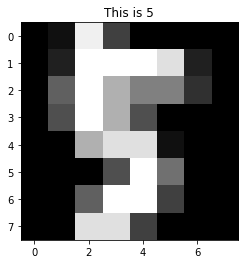

In [3]:
i = 46
plt.imshow(digits.images[i], cmap='gray')
plt.title('This is {}'.format(digits.target[i]))
plt.show()

In [87]:
#1, мой кминс возвращает массив координат центров и массив  в котором на jом месте стоит номер кластера для jой точки

import numpy as np
def k1_means(pts,k,t=20, eps = 1e-05):
    n=pts.shape[0] #количество точек
    d=pts.shape[1] #размерность наблюдений
    ncentr=pts[:k,:] #сначала центроидами берем первые k точек
    pts=np.expand_dims(pts,axis=1) #добавление размерности в матрицу точек
    centr=np.zeros((k,d))
    ndistort=256
    distort=0
    i=0
    while np.abs(ndistort-distort) > eps and i<t:
        centr=ncentr
        distort=ndistort
        clust=np.argmin(((pts-ncentr)**2).sum(axis=2),axis=1) #по правилу бродкастинга pts-ncentr это матрица n*k*m
        M=np.zeros(n*k*d).reshape(n,k,d)
        M[np.arange(n),clust]=(pts-ncentr)[np.arange(n),clust]/np.bincount(clust)[clust].reshape(n, 1)
        ncentr=centr+M.sum(axis=0)
        clust=np.argmin(((pts-ncentr)**2).sum(axis=2),axis=1) #массив в котором на iом месте стоит номер кластера для iой точки
        M=np.zeros(n*k*d).reshape(n,k,d)
        M[np.arange(n),clust]=(pts-ncentr)[np.arange(n),clust]
        ndistort=np.sqrt((M ** 2).sum(axis=2)).sum(axis=1).mean()
        i=i+1
    return ncentr, clust





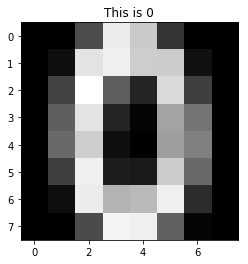

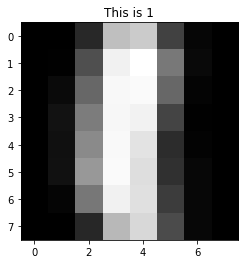

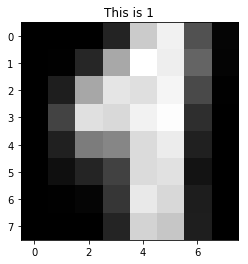

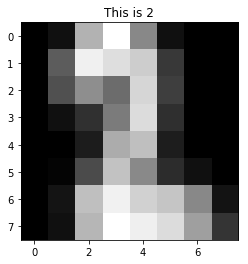

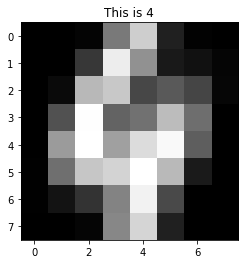

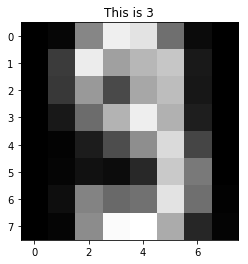

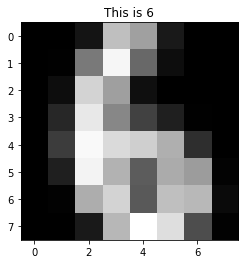

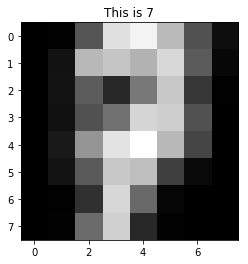

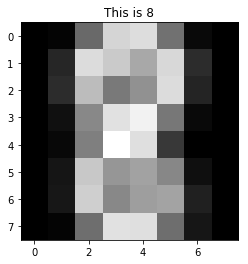

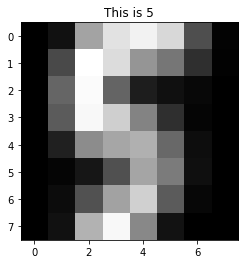

In [166]:
#1 продолжение
A=digits.images.reshape(digits.images.shape[0],64,1).squeeze(axis=2) #преобразуем данные чтоб использовать к-минс
B=k1_means(A,10)[0] #массив координат центров

C=k1_means(A,10)[1] #получаем массив, где на jом месте стоит номер кластера jой точки
def get_digit(C,P,i):
    ind,=np.where(C==i) #получаем массив, где стоят номера точек, отнесенных к iому кластеру
    length=ind.shape[0]
    x=P[ind[np.arange(length)]] #массив где для каждой точки из кластера i показано какой настоящей цифрой она является
    return np.bincount(x).argmax()

trg=np.zeros((10), dtype=int)
for i in range(10):
    trg[i]=get_digit(C,digits.target,i)
    plt.imshow(B[i].reshape(8,8),cmap='gray')
    plt.title('This is {}'.format(trg[i]))
    plt.show()

In [274]:
#2
def error_rate(C,A):
    newdigit=np.zeros((digits.target.shape[0]),dtype=int)
    m=digits.target.shape[0]
    for i in range(m):
        newdigit[i]=get_digit(C,digits.target,C[i]) #массив где точки присвоено ее распознанное алгоритмом значение
    x=newdigit[newdigit!=A]
    return x.size/digits.target.shape[0]
print(error_rate(C,digits.target))

    


0.20868113522537562


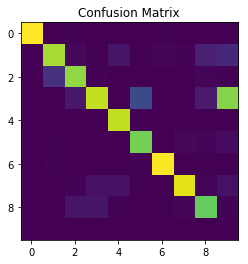

In [269]:
#3
newdigit=np.zeros((digits.target.shape[0]),dtype=int)
m=digits.target.shape[0]
for i in range(m):
    newdigit[i]=get_digit(C,digits.target,C[i]) #массив где точки присвоено ее распознанное алгоритмом значение

m=np.zeros((100),dtype=int)
m=matrix.reshape(10,10)
for i in range(10):
    for j in range(10):
        matrix[i,j]=np.where((newdigit==i) & (digits.target==j))[0].shape[0]
plt.imshow(matrix)
plt.title("Confusion Matrix")
plt.show()
#можем увидеть, что алгоритм плохо классифицирует 5,8,9(особенно), а так же принимает 9 за 3.

In [280]:
#4
matrix_error=np.zeros(20)
for i in range(10,30):
    F=k1_means(A,i)[1]
    matrix_error[i-10]=error_rate(F,digits.target)
matrix_error

array([0.20868114, 0.1903172 , 0.19866444, 0.1179744 , 0.11908737,
       0.11352254, 0.11018364, 0.10851419, 0.10907067, 0.09905398,
       0.10962716, 0.10962716, 0.11240957, 0.10127991, 0.08013356,
       0.09627156, 0.08402894, 0.08124652, 0.0951586 , 0.09293267])

<function matplotlib.pyplot.show(*args, **kw)>

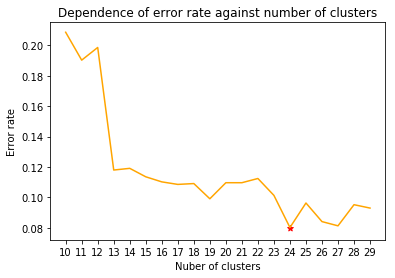

In [301]:
#4
x=np.arange(10,30)
plt.plot(x,matrix_error,color='orange')
plt.xticks(x[:])
plt.scatter(x[np.argmin(matrix_error)],matrix_error[np.argmin(matrix_error)],marker="*",color="red")
plt.title("Dependence of error rate against number of clusters")
plt.xlabel("Nuber of clusters")
plt.ylabel("Error rate")
plt.show
#видим, что оптимальное значение для количества кластеров - 24

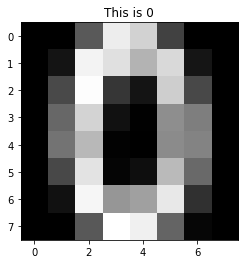

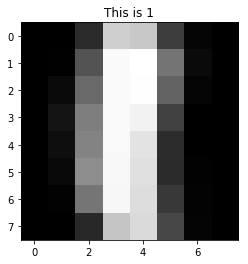

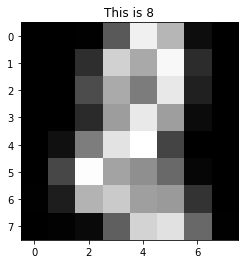

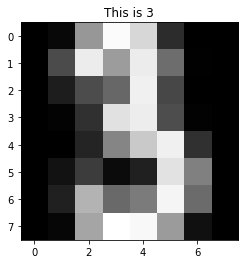

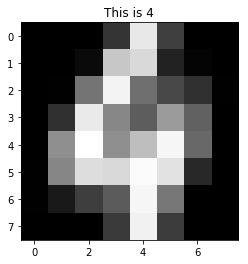

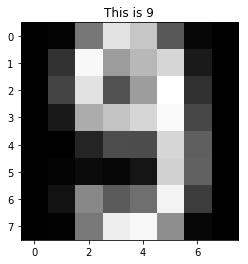

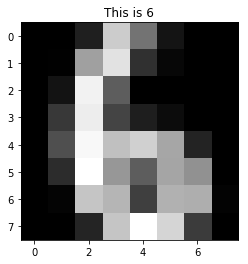

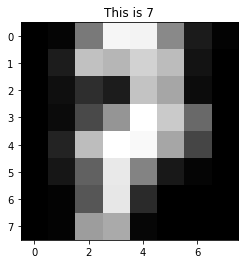

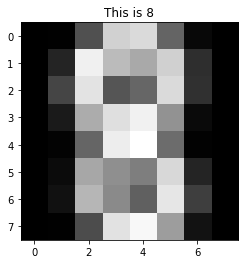

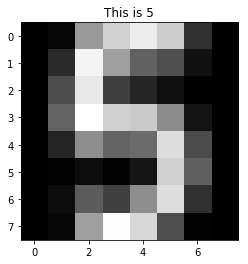

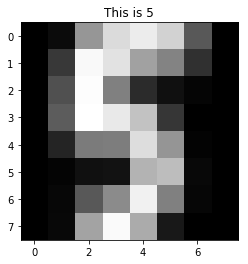

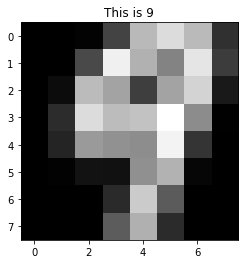

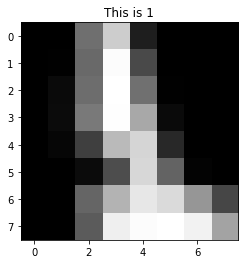

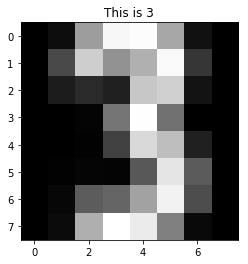

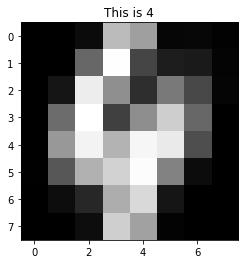

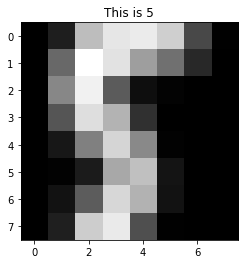

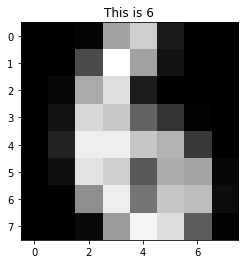

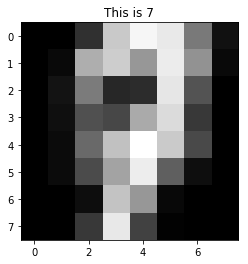

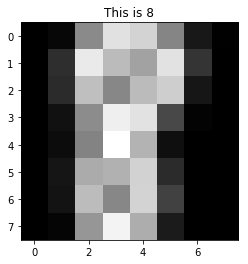

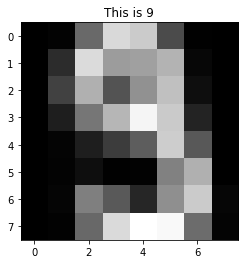

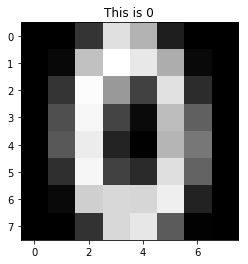

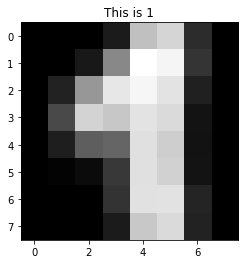

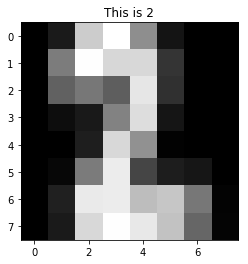

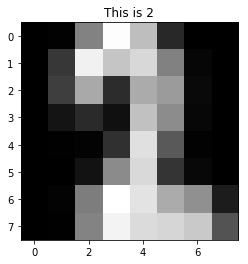

In [302]:
#5 Применим алгоритм для разбиения на 24 кластера:
R=k1_means(A,24)[0] 
Z=k1_means(A,24)[1]
trg=np.zeros((24), dtype=int)
for i in range(24):
    trg[i]=get_digit(Z,digits.target,i)
    plt.imshow(R[i].reshape(8,8),cmap='gray')
    plt.title('This is {}'.format(trg[i]))
    plt.show()
    #как мы видим, для каждой цифры теперь 2-3 кластера


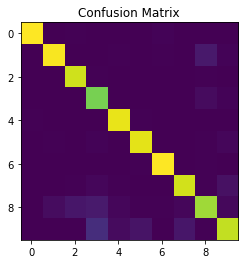

In [303]:
#5
newdigit=np.zeros((digits.target.shape[0]),dtype=int)
m=digits.target.shape[0]
for i in range(m):
    newdigit[i]=get_digit(Z,digits.target,Z[i])
m=np.zeros((100),dtype=int)
m=matrix.reshape(10,10)
for i in range(10):
    for j in range(10):
        matrix[i,j]=np.where((newdigit==i) & (digits.target==j))[0].shape[0]
plt.imshow(matrix)
plt.title("Confusion Matrix")
plt.show()
# с цифрой 9 ситуация стала в разы лучше, но все еще матрица неидеальна, если мы посмотрим на 2,3,8.